In [1]:
import pandas as pd
import numpy as np
import toad

In [2]:
data=pd.read_csv("D:/从c盘转移的桌面/github/Python Financial Engineering/Financial Engineering Project3/germancredit.csv")
data.replace({'good':0,"bad":1},inplace=True)

In [3]:
combiner=toad.transform.Combiner()
combiner.fit(data,y='creditability',method='chi',min_samples=0.05)

In [4]:
bins=combiner.export()
bins['duration.in.month']

[9, 12, 13, 16, 36, 45]

In [5]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [6]:
from toad.plot import bin_plot
c2=toad.transform.Combiner()
c2.fit(data[['duration.in.month','creditability']],y='creditability',method='chi',min_samples=0.05)
transformed=c2.transform(data[['duration.in.month','creditability']],labels=True)

<Axes: xlabel='duration.in.month', ylabel='prop'>

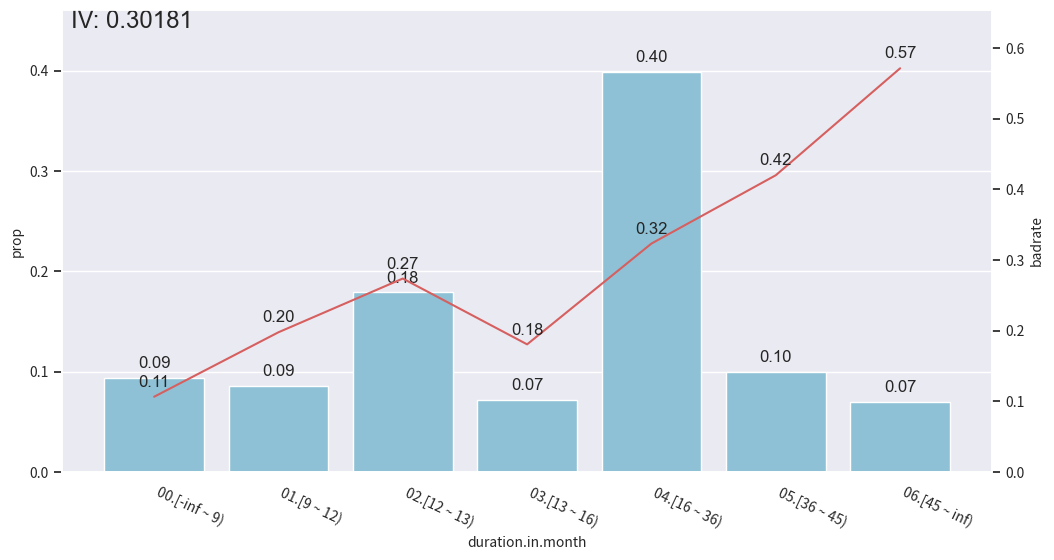

In [7]:
bin_plot(transformed,x='duration.in.month',target = 'creditability')

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('creditability',axis=1),data['creditability'],test_size=0.25,random_state=450)
data_test=pd.concat([x_test,y_test],axis=1)
data_train=pd.concat([x_train,y_train],axis=1)

In [9]:
data_train['type'] = 'train'

In [10]:
from toad.plot import badrate_plot

In [11]:
data_=pd.concat([data_train,data_test],axis =0)
temp_data = c2.transform(data_[['duration.in.month','creditability','type']])

In [12]:
binned_data = c2.transform(data_train)
transer = toad.transform.WOETransformer()
data_tr_woe = transer.fit_transform(binned_data,binned_data['creditability'],exclude=['creditability','type'])
data_tr_woe.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability,type
569,0.786313,1.048206,0.046896,-0.384125,0.834631,0.244802,0.002898,-0.056341,0.355058,-0.014765,...,-0.030366,-0.157497,-0.174441,0.039485,0.002648,0.012822,0.001722,0.043742,1,train
574,0.363027,-0.650754,0.046896,-0.384125,0.834631,0.244802,-0.173326,0.154169,-0.212356,-0.014765,...,-0.418132,-0.157497,-0.174441,-0.053488,-0.298467,0.012822,-0.001130,0.043742,0,train
993,0.786313,0.623322,0.046896,0.141484,0.834631,0.244802,0.534527,0.154169,-0.212356,-0.014765,...,-0.146198,-0.157497,-0.174441,0.039485,0.309621,0.012822,0.001722,0.043742,0,train
355,0.363027,0.115776,0.046896,0.272947,0.834631,0.244802,0.399313,0.154169,-0.212356,-0.014765,...,0.777473,0.723406,-0.174441,0.039485,-0.298467,0.012822,-0.001130,0.043742,1,train
508,-1.072960,0.115776,0.046896,-0.384125,0.141484,0.244802,0.002898,0.154169,-0.302447,-0.014765,...,0.275016,-0.157497,-0.174441,0.039485,0.002648,0.012822,-0.001130,0.043742,0,train
